In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets
%matplotlib inline

In [29]:
iris = datasets.load_iris()

In [30]:
print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [31]:
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


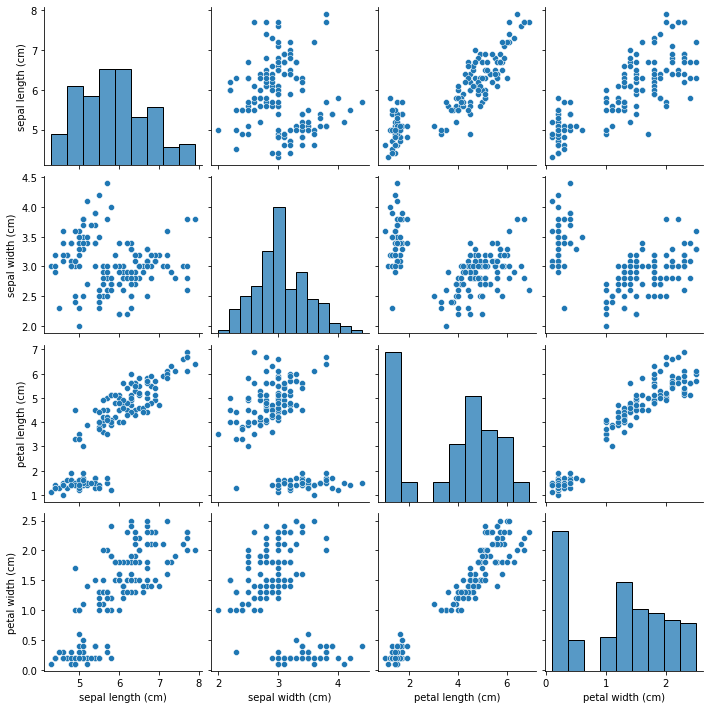

In [32]:
sns.pairplot(df,palette='coolwarm')

In [33]:
df.isnull().sum()

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
dtype: int64

<AxesSubplot:>

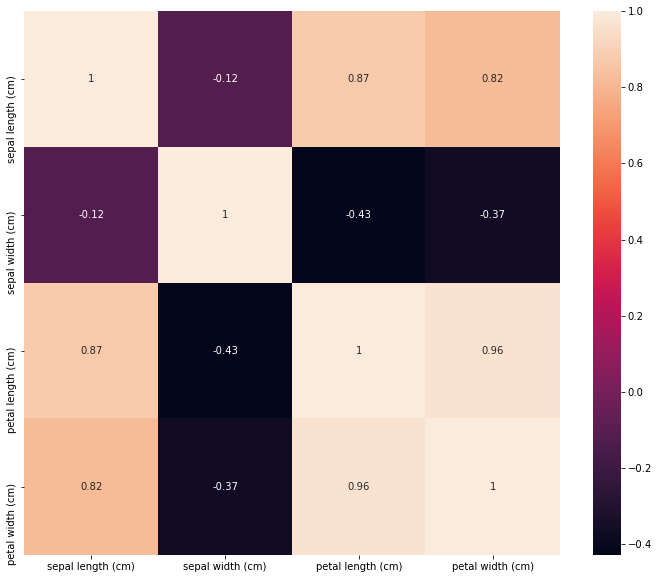

In [34]:
fig, ax = plt.subplots()
# the size of A4 paper
fig.set_size_inches(12, 10)
sns.heatmap(df.corr(), annot=True)

# Standardize the Variables

Because the KNN classifier predicts the class of a given test observation by identifying the observations that are nearest to it, the scale of the variables matters. Any variables that are on a large scale will have a much larger effect on the distance between the observations, and hence on the KNN classifier, than variables that are on a small scale.

**Import StandardScaler from Scikit learn.**

In [35]:
from sklearn.preprocessing import StandardScaler

In [36]:
scaler = StandardScaler()
scaler.fit(df)

StandardScaler()

In [37]:
scaled_features = scaler.transform(df)
scaled_features

array([[-9.00681170e-01,  1.01900435e+00, -1.34022653e+00,
        -1.31544430e+00],
       [-1.14301691e+00, -1.31979479e-01, -1.34022653e+00,
        -1.31544430e+00],
       [-1.38535265e+00,  3.28414053e-01, -1.39706395e+00,
        -1.31544430e+00],
       [-1.50652052e+00,  9.82172869e-02, -1.28338910e+00,
        -1.31544430e+00],
       [-1.02184904e+00,  1.24920112e+00, -1.34022653e+00,
        -1.31544430e+00],
       [-5.37177559e-01,  1.93979142e+00, -1.16971425e+00,
        -1.05217993e+00],
       [-1.50652052e+00,  7.88807586e-01, -1.34022653e+00,
        -1.18381211e+00],
       [-1.02184904e+00,  7.88807586e-01, -1.28338910e+00,
        -1.31544430e+00],
       [-1.74885626e+00, -3.62176246e-01, -1.34022653e+00,
        -1.31544430e+00],
       [-1.14301691e+00,  9.82172869e-02, -1.28338910e+00,
        -1.44707648e+00],
       [-5.37177559e-01,  1.47939788e+00, -1.28338910e+00,
        -1.31544430e+00],
       [-1.26418478e+00,  7.88807586e-01, -1.22655167e+00,
      

In [38]:
scaled_df = pd.DataFrame(data=scaled_features, columns=iris.feature_names)
scaled_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,-0.900681,1.019004,-1.340227,-1.315444
1,-1.143017,-0.131979,-1.340227,-1.315444
2,-1.385353,0.328414,-1.397064,-1.315444
3,-1.506521,0.098217,-1.283389,-1.315444
4,-1.021849,1.249201,-1.340227,-1.315444


## Choosing a K Value

Let's go ahead and use the elbow method to pick a good K Value:

In [39]:
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.neighbors import KNeighborsClassifier

In [40]:
from sklearn.model_selection import train_test_split

In [41]:
X_train, X_test, y_train, y_test = train_test_split(scaled_features,iris.target,test_size=0.30, random_state=101)

In [42]:
error_rate = []

# Will take some time
for i in range(1,40):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Error Rate')

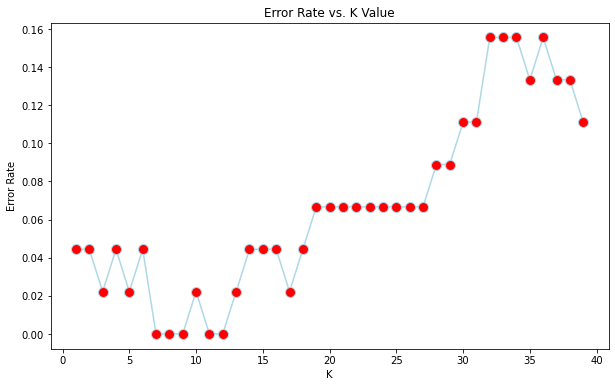

In [43]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='lightblue', linestyle='-', marker='o',
         markerfacecolor='red', markersize=10 )
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

WITH K=1


[[13  0  0]
 [ 0 19  1]
 [ 0  1 11]]


              precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       0.95      0.95      0.95        20
           2       0.92      0.92      0.92        12

    accuracy                           0.96        45
   macro avg       0.96      0.96      0.96        45
weighted avg       0.96      0.96      0.96        45

0  =  setosa
1  =  versicolor
2  =  virginica


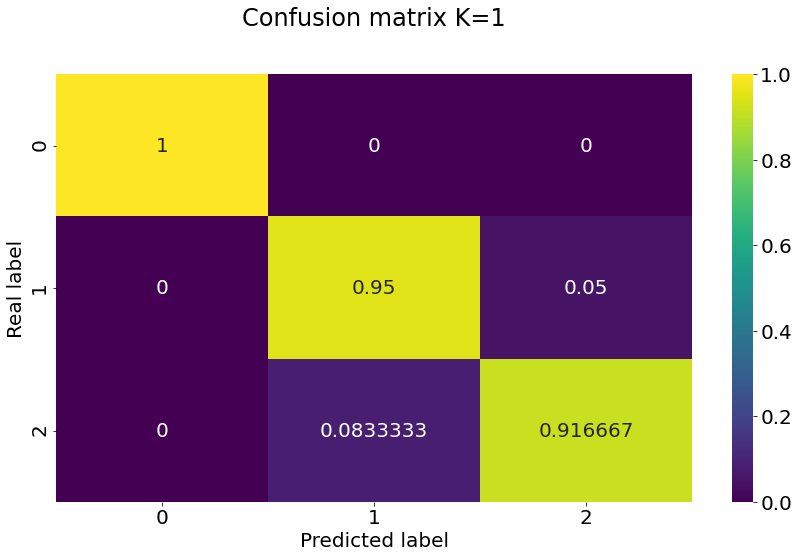

In [65]:
knn = KNeighborsClassifier(n_neighbors=1)

knn.fit(X_train,y_train)
pred = knn.predict(X_test)

print('WITH K=1')
print('\n')
print(confusion_matrix(y_test,pred))
print('\n')
print(classification_report(y_test,pred))
cm= confusion_matrix(y_test,pred)

##Normalized confusion matrix 
cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
plt.rcParams.update({'font.size': 20})
fig, ax = plt.subplots(figsize = (12, 7))
tick_marks = np.arange(len(iris.target_names))
plt.xticks( tick_marks, list(iris.target_names))
plt.yticks(tick_marks, iris.target_names)
# create heatmap
sns.heatmap(pd.DataFrame(cm), annot=True, cmap="viridis", fmt='g')
#ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix K=1', y=1.1)
plt.ylabel('Real label')
plt.xlabel('Predicted label')
for x in tick_marks:
    print(tick_marks[x] , " = " , iris.target_names[x])

WITH K=3


[[13  0  0]
 [ 0 20  0]
 [ 0  1 11]]


              precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       0.95      1.00      0.98        20
           2       1.00      0.92      0.96        12

    accuracy                           0.98        45
   macro avg       0.98      0.97      0.98        45
weighted avg       0.98      0.98      0.98        45

0  =  setosa
1  =  versicolor
2  =  virginica


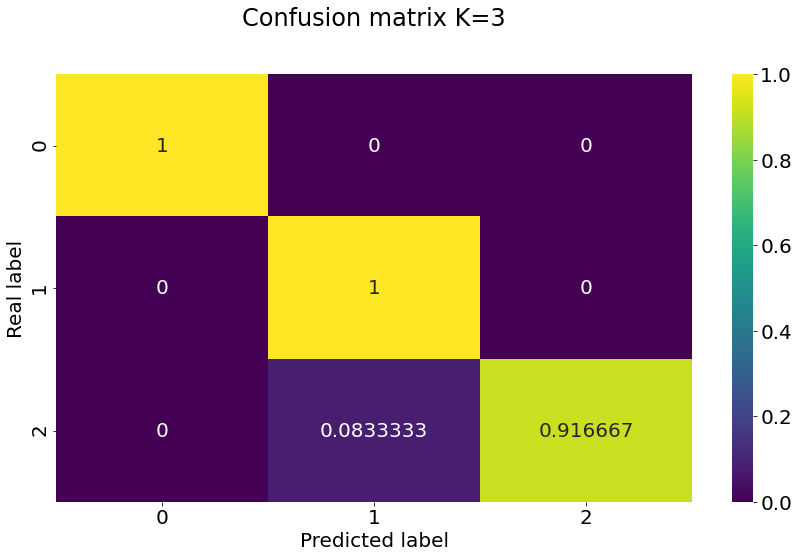

In [66]:
knn = KNeighborsClassifier(n_neighbors=3)

knn.fit(X_train,y_train)
pred = knn.predict(X_test)

print('WITH K=3')
print('\n')
print(confusion_matrix(y_test,pred))
print('\n')
print(classification_report(y_test,pred))
cm= confusion_matrix(y_test,pred)

##Normalized confusion matrix 
cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
plt.rcParams.update({'font.size': 20})
fig, ax = plt.subplots(figsize = (12, 7))
tick_marks = np.arange(len(iris.target_names))
plt.xticks( tick_marks, list(iris.target_names))
plt.yticks(tick_marks, iris.target_names)
# create heatmap
sns.heatmap(pd.DataFrame(cm), annot=True, cmap="viridis", fmt='g')
#ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix K=3', y=1.1)
plt.ylabel('Real label')
plt.xlabel('Predicted label')
for x in tick_marks:
    print(tick_marks[x] , " = " , iris.target_names[x])

WITH K=10


[[13  0  0]
 [ 0 20  0]
 [ 0  1 11]]


              precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       0.95      1.00      0.98        20
           2       1.00      0.92      0.96        12

    accuracy                           0.98        45
   macro avg       0.98      0.97      0.98        45
weighted avg       0.98      0.98      0.98        45

0  =  setosa
1  =  versicolor
2  =  virginica


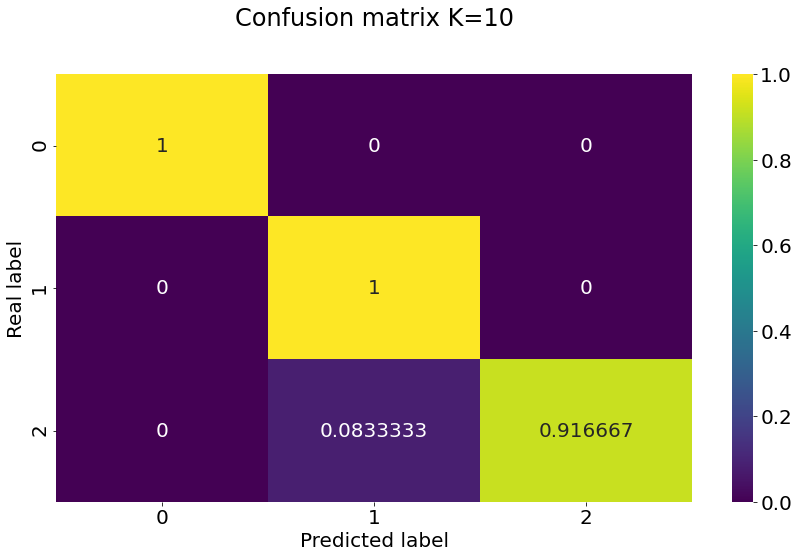

In [67]:
knn = KNeighborsClassifier(n_neighbors=10)

knn.fit(X_train,y_train)
pred = knn.predict(X_test)

print('WITH K=10')
print('\n')
print(confusion_matrix(y_test,pred))
print('\n')
print(classification_report(y_test,pred))
cm= confusion_matrix(y_test,pred)

##Normalized confusion matrix 
cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
plt.rcParams.update({'font.size': 20})
fig, ax = plt.subplots(figsize = (12, 7))
tick_marks = np.arange(len(iris.target_names))
plt.xticks( tick_marks, list(iris.target_names))
plt.yticks(tick_marks, iris.target_names)
# create heatmap
sns.heatmap(pd.DataFrame(cm), annot=True, cmap="viridis", fmt='g')
#ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix K=10', y=1.1)
plt.ylabel('Real label')
plt.xlabel('Predicted label')
for x in tick_marks:
    print(tick_marks[x] , " = " , iris.target_names[x])

In [50]:
cm = confusion_matrix(y_test,pred)
cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
cm

array([[1.        , 0.        , 0.        ],
       [0.        , 1.        , 0.        ],
       [0.        , 0.08333333, 0.91666667]])